In [1]:
import pandas as pd
import numpy as np

#визуал
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

#другие штуки
import os
import time
from datetime import datetime as d
#from geopy.distance import distance #для нахождения дитстанции по точкам
#from geopandas.tools import geocode #для нахождения координат

In [2]:
month_dict = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
              7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [3]:
DAY = d.now().day
DAY = DAY if DAY > 9 else '0' + str(DAY)
MONTH = d.now().month
#DAY = 7
#MONTH = 10 

NAME = 'ярин'
DIRECTORY = 'data/' + str(MONTH)
files = os.listdir(DIRECTORY)

In [4]:
#функция переименовывания файлов к единому стандарту
def rename_files(str):
    return '.'.join(str.replace(',', ' ').replace('.', ' ').split()[:2]) + '.xlsx'

for file in files:
    day_r = time.ctime(os.path.getatime(DIRECTORY + '/' + file)).split()[2]
    if day_r != DAY:
            old_file = os.path.join(DIRECTORY, file)
            new_file = os.path.join(DIRECTORY, rename_files(file))
            os.rename(old_file, new_file)

In [6]:
data = pd.read_excel(f'data/{MONTH}/{DAY+1}.{MONTH}.xlsx')

In [7]:
# определяем стартовый индекс
start_ind, finish_ind = 0, data.shape[0]
for ind in data.index:
    if data.iloc[ind]['Unnamed: 1'] is not np.nan and NAME.title() in data.iloc[ind]['Unnamed: 1']:
        start_ind = ind
        break

# определяем конечный индекс
count = 0
for ind in range(start_ind + 1, data.shape[0]):
    if type(data.iloc[ind]['Unnamed: 1']) == str:
        count += 1
    if count == 2:
        finish_ind = ind - 2
        break
if NAME.title() not in data.iloc[start_ind]['Unnamed: 1']:
    print('Завтра не работаешь')
else:
    print('Работаем')
    clear_data = data.loc[start_ind:finish_ind, :] 

Работаем


In [8]:
clear_data.drop('Unnamed: 1', axis=1, inplace=True)
clear_data['Unnamed: 3'] = clear_data['Unnamed: 3'].apply(lambda x: np.nan if x == 'Наименование' else x)
clear_data.dropna(axis=0, inplace=True)
clear_data.set_index(np.arange(len(clear_data.index)), inplace=True)
clear_data.drop(clear_data.columns[0], axis=1, inplace=True)

/tmp/ipykernel_11058/2696612066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data.drop('Unnamed: 1', axis=1, inplace=True)
/tmp/ipykernel_11058/2696612066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['Unnamed: 3'] = clear_data['Unnamed: 3'].apply(lambda x: np.nan if x == 'Наименование' else x)
/tmp/ipykernel_11058/2696612066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [9]:
#переименовываем столбцы
clear_data.rename(columns={'Unnamed: 2':'num', 'Unnamed: 3':'ration', 'Unnamed: 4':'address', 'Unnamed: 5':'start', 'Unnamed: 6':'finish', 'Unnamed: 7':'comment'}, inplace=True)

/tmp/ipykernel_11058/3381834281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data.rename(columns={'Unnamed: 2':'num', 'Unnamed: 3':'ration', 'Unnamed: 4':'address', 'Unnamed: 5':'start', 'Unnamed: 6':'finish', 'Unnamed: 7':'comment'}, inplace=True)


In [10]:
# функция которая сокращает название рациона
def edit_ration_name(name):
    if 'Снижение' in name:
        return name.replace('Снижение', '').strip()
    elif 'Баланс' in name:
        return name.replace('Баланс', '').strip()
    elif 'Classic' in name:
        return name.replace('Classic', '').strip()
    elif 'Набор' in name:
        return name.replace('Набор', '').strip()

In [11]:
clear_data['start'] = clear_data['start'].apply(lambda x: int(x[0]) if len(x) <= 4 else int(x[:2])) # заменяем начало интервала со строкого формата на числовой
clear_data['finish'] = clear_data['finish'].apply(lambda x: int(x[0]) if len(x) <= 4 else int(x[:2]))# заменяем конец интервала со строкого формата на числовой
clear_data['ration'] = clear_data['ration'].apply(edit_ration_name)

/tmp/ipykernel_11058/2443524829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['start'] = clear_data['start'].apply(lambda x: int(x[0]) if len(x) <= 4 else int(x[:2])) # заменяем начало интервала со строкого формата на числовой
/tmp/ipykernel_11058/2443524829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['finish'] = clear_data['finish'].apply(lambda x: int(x[0]) if len(x) <= 4 else int(x[:2]))# заменяем конец интервала со строкого формата на числовой
/tmp/ipykernel_11058/244

In [12]:
def make_address_col(df):

    #список адресов
    list_of_address = list(df['address'])
    list_of_address = [elem.replace('пр-кт', 'проспект') for elem in list_of_address]
    # список адресов дальняков
    area_list = ['Первоуральск', 'Верхняя Пышма', 'Ревда', 'Берёзовский', 'Заречный', 'деревня', 
                   'посёлок', 'район', 'микрорайон', 'СНТ', 'Среднеуральск', 'Полевской']

    #созадем списки улицы, номера дома и города
    street_list, house_list, area_true_list = [], [], []
    for elem in list_of_address:
        ls = elem.split(',')
        for ind, name in enumerate(ls):
            if 'ул' in name or 'улица' in name or 'проспект' in name or 'переулок' in name:
                street_list.append(name)
                house_list.append(ls[ind + 1])
            else:
                street_list.append('другое')

    def get_area(address):
    #функция возвращает город адреса доставки
        for elem in address.split(','):
            if elem in area_list:
                return elem
            else:
                return 'Екатеринбург'

    def get_true_num(num):
    #функция меняет номер дома с корпусом на номер дома с корпусом,но уже без буквы "к" для geocodera
        new_num = ''
        for i in num:
            if i == 'к':
                new_num += '/'
            else:
                new_num += i
        return new_num

    df['street'] = street_list
    df['house'] = house_list
    df['house'] = df['house'].apply(get_true_num)
    df['area'] = df['address'].apply(get_area)
    clear_data['short_address'] = clear_data['street'] + ',' + clear_data['house'] + ',' + clear_data['area']
    
    return df

In [13]:
#clear_data = make_address_col(clear_data)

#### Чистая дата

In [14]:
clear_data

,num,ration,address,start,finish,comment
0,2550338,None,"Россия, Свердловская область, Екатеринбург, ул...",6,8,"Звонить за 15 минут, клиент спуститься."
1,2595151,750,"улица Якова Свердлова, 2, Екатеринбург, Свердл...",6,8,
2,2589745,1500,"Россия, Свердловская область, Екатеринбург, ул...",6,8,
3,2587876,1000,"подъезд 1, Кузнечная улица, 79, Екатеринбург, ...",6,8,Не звонить на телефон | в домофон и в дверной ...
4,2592211,1500,"Россия, Свердловская область, Екатеринбург, ул...",8,10,Звонить за 10-15 мин
5,2595315,2000,"Екатеринбург, ул Шевченко, 20 , кв. 12, эт. 5,...",8,10,Не звонить на телефон;
6,2559345,2000,"Екатеринбург, ул Братьев Быковых, 5 , кв. 27, ...",6,8,
7,2596038,1000,"Россия, Свердловская область, Екатеринбург, Ол...",10,12,Не звонить на телефон | в домофон и в дверной ...
8,2581366,2500,"Россия, Свердловская область, Екатеринбург, ул...",6,8,
9,2590241,1500,"Екатеринбург, ул Челюскинцев, 64а , кв. 82, эт...",6,8,


In [15]:
clear_data.iloc[7]['address']

'Россия, Свердловская область, Екатеринбург, Олимпийская набережная, 9/2  , домоф. ресепшен кнопка, под. секция 8'

### Вывод полного отчета

___

In [16]:
def print_hist_details_value():
    '''рисуем гистограмму распределения временных интервалов и рационов'''
    fig, axes = plt.subplots(1, 3, figsize=(25, 8))
    
    time_delta = sns.countplot(y=clear_data['start'], ax=axes[0])
    time_delta.set_title('Распределения заказов \n по интервалам', fontsize=16)
    time_delta.set_ylabel('Начало интервала', fontsize=12)
    time_delta.set_xlabel('Количество пакетов', fontsize=12)
    
    ration = sns.countplot(x=clear_data['ration'], ax=axes[1])
    ration.set_title('Распределение общего числа пакетов \n по рационам', fontsize=16)
    ration.set_xlabel('Рацион', fontsize=12)
    ration.set_ylabel('Количество пакетов', fontsize=12)
    
    track = sns.lineplot(x=range(clear_data.shape[0]), y=clear_data['start'], label='start', ax=axes[2])
    track2 = sns.lineplot(x=range(clear_data.shape[0]), y=clear_data['finish'], label='finish', ax=axes[2])
    track.set_title('Придумать', fontsize=16)
    track.set_xlabel('Час', fontsize=12)
    track.set_ylabel('Очередность заказа', fontsize=12)
    
    plt.tight_layout()

In [17]:
def check_expreess_delivery():
    '''Проверяем есть ли эксспресс доставки, если есть то выводим номера заказов'''
    list_of_express = []
    for ind in clear_data.index:
        result = clear_data.iloc[ind]['finish'] - clear_data.iloc[ind]['start']
        if result < 2:
            list_of_express.append((clear_data.iloc[ind]['num']))
    if len(list_of_express) > 1:
        print('У клиента(ов) под номером:') 
        print(*list_of_express, sep='\n')
        print('экспресс доставка')
    elif len(list_of_express) == 1:
        print('У клиента под номером:') 
        print(*list_of_express)
        print('экспресс доставка')
    else:
        print('Экспресс доставок нет')


In [18]:
def geo_delivery():
    '''Определяет районы доставки на следующий день'''
    
    remote_area = ['Первоуральск', 'Верхняя Пышма', 'Ревда', 'Берёзовский', 'Заречный', 'деревня', 
                   'посёлок', 'район', 'село', 'микрорайон', 'СНТ', 'Среднеуральск', 'Полевской']
    geo_set = set()
    
    for ind in clear_data.index:
        result = clear_data.iloc[ind]['address'].split(',')
        for elem in result:
            for area in remote_area:
                if area in elem:
                    geo_set.add('   ' + elem.strip().title())
    if geo_set:
        print('Районы доставки:')
        print(*list(geo_set), sep='\n')
    else:
        print('Район не определен')

In [19]:
def dow():
    days= {1:"Вторник", 2:"Среда", 3:"Четверг", 4:"Пятница", 5:"Суббота", 6:"Воскресенье"}
    dayNumber=d.now().weekday() + 1
    return 'Понедельник' if dayNumber == 7 else days[dayNumber]

In [20]:
def show_details():
    print(f'Завтра {dow()}')
    geo_delivery()
    print('_' * 45)
    print(f'{clear_data.shape[0]} пакетов')
    print('_' * 45)
    print(f'Количество одноадрессных пакетов: {clear_data["address"].duplicated().sum()}')
    print('_' * 45)
    check_expreess_delivery()
    print_hist_details_value() 

___

In [21]:
a = np.array([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])
(a.std())**2

0.3167346938775512

Завтра Понедельник
Район не определен
_____________________________________________
39 пакетов
_____________________________________________
Количество одноадрессных пакетов: 1
_____________________________________________
Экспресс доставок нет


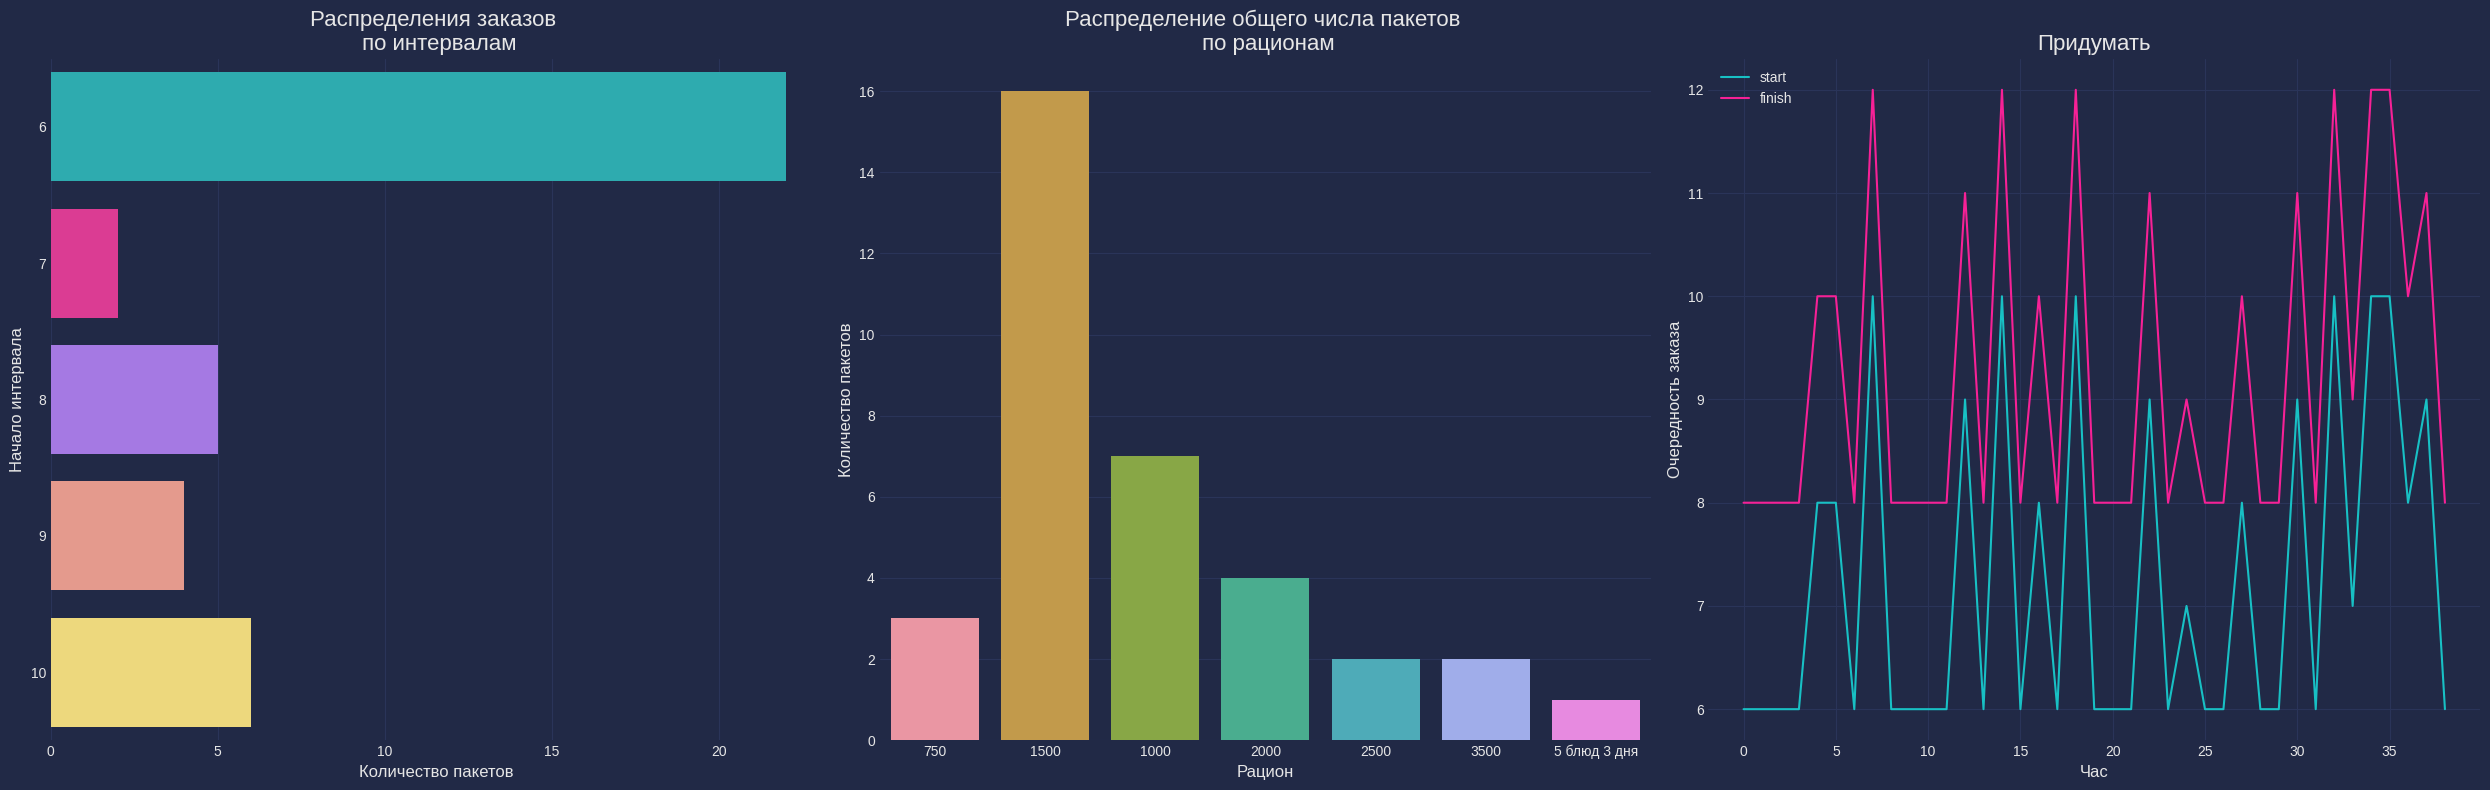

In [22]:
show_details()

Доработать write_short_rout

In [31]:
def write_short_rout(data):
    directory_short = 'shortdata'
    if str(MONTH) not in os.listdir(directory_short):
        os.mkdir(f'{directory_short}/{str(MONTH)}')
    else:
        if DAY not in os.listdir(f'{directory_short}/{str(MONTH)}'):
            data.to_excel(f'shortdata/{str(MONTH)}/{str(DAY + 1)}.xlsx')

In [32]:
write_short_rout(clear_data)

___

#### use OSRM

___

In [24]:
location = geocode(list(clear_data['short_address']), provider='nominatim', user_agent='my_request')['geometry']

KeyError: 'short_address'

In [ ]:
loc = pd.Series(location)
data = pd.concat([clear_data, loc], axis=1)

In [ ]:
data['lng'] = data['geometry'].apply(lambda x: float(str(x).split()[2].replace(')', '')))
data['lat'] = data['geometry'].apply(lambda x: float(str(x).split()[1].replace('(', '')))
data.drop(['address', 'geometry'], axis=1, inplace=True)

In [ ]:
data

,num,ration,start,finish,comment,street,house,area,short_address,lng,lat
0,2468637,2500,6,7,Позвонить за 10-15 минут. Экспресс доставка оп...,проспект Космонавтов,11А,Екатеринбург,"проспект Космонавтов, 11А ,Екатеринбург",56.866949,60.609620
1,2452617,2500,6,8,,проспект Космонавтов,32,Екатеринбург,"проспект Космонавтов, 32 ,Екатеринбург",56.882245,60.613833
2,2492082,2000,6,8,Оставить У двери;Во двор по возможности не зае...,улица Уральских Рабочих,4,Екатеринбург,"улица Уральских Рабочих, 4,Екатеринбург",56.891901,60.610541
3,2490705,L,6,8,Домофон не работает | Домофон не работает,улица Ильича,35,Екатеринбург,"улица Ильича, 35,Екатеринбург",56.892412,60.600123
4,2485950,750,7,9,,ул Машиностроителей,18,Екатеринбург,"ул Машиностроителей, 18 ,Екатеринбург",56.884624,60.572409
5,2481495,XS,7,9,,улица Ломоносова,59,Екатеринбург,"улица Ломоносова, 59 ,Екатеринбург",56.904027,60.591986
6,2477183,1500,6,8,Если трубку не беру все равно везти доставку в...,ул Народного фронта,70,Екатеринбург,"ул Народного фронта, 70 ,Екатеринбург",56.911436,60.590775
7,2488910,1500,6,8,,Коммунистическая улица,10,Екатеринбург,"Коммунистическая улица, 10 ,Екатеринбург",56.907317,60.598791
8,2488913,1500,6,8,,Коммунистическая улица,10,Екатеринбург,"Коммунистическая улица, 10 ,Екатеринбург",56.907317,60.598791
9,2488911,1500,6,8,,Коммунистическая улица,10,Екатеринбург,"Коммунистическая улица, 10 ,Екатеринбург",56.907317,60.598791


In [ ]:
sizes_dict = {
'big_scale': {'y':(56.480769, 57.004323), 'x':(59.773773, 61.354864)},
'small_scale':{'y':(56.742445, 56.916793), 'x':(60.494621, 60.689418)},
'very_small':{'y':(data['lng'].min(), data['lng'].max()),'x':(data['lat'].min(), data['lat'].max())}
}

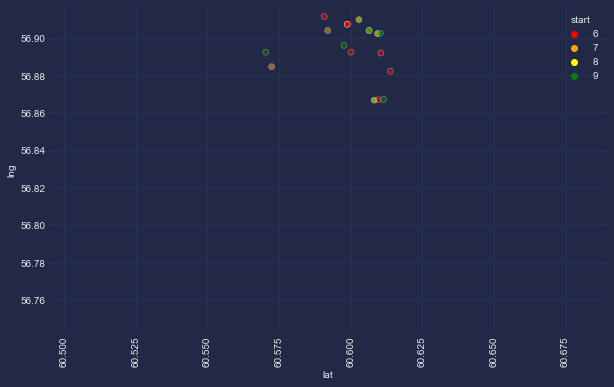

In [ ]:
colors = {6:'red', 7:'orange', 8:'yellow', 9:'green', 10:'blue'}

fig, ax = plt.subplots(figsize=(10, 6))
sca = sns.scatterplot(data=data, x='lat', y='lng', hue='start', palette=colors, legend="full", alpha=0.5)
sca.set_xlim(sizes_dict['small_scale']['x'])
sca.set_ylim(sizes_dict['small_scale']['y'])
sca.xaxis.set_tick_params(rotation=90);

In [ ]:
def get_distance(data):
    #функция возвращает дистанцию маршрута
    dist = 0
    coor = [i for i in zip(data['lat'], data['lng'])]
    for ind in range(0, len(coor)):
        if ind == len(coor) - 1:
            break
        else:
            dist += distance(coor[ind], coor[ind + 1]).m
    
    return f'Длина маршрута: {round(dist / 1000)} км'

In [ ]:
get_distance(data)

'Длина маршрута: 20 км'